In [1]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"]="7"

In [2]:
import cv2
from PIL import  Image
import numpy as np

In [3]:
image_directory = '/data1/hom1/ict06/Br35H Brain Tumor Detection 2020/dataset/'

dataset=[]
label=[]

no_tumor_images = os.listdir('/data1/hom1/ict06/Br35H Brain Tumor Detection 2020/dataset/no')
yes_tumor_images = os.listdir('/data1/hom1/ict06/Br35H Brain Tumor Detection 2020/dataset/yes')

In [4]:
for i , image_name in enumerate(no_tumor_images):
  if(image_name.split('.')[1]== 'jpg'):
      image=cv2.imread(image_directory+'no/'+image_name)
      image=Image.fromarray(image, 'RGB')
      image=image.resize((224,224))
      dataset.append(np.array(image))
      label.append(0)

In [5]:
for i , image_name in enumerate(yes_tumor_images):
  if(image_name.split('.')[1]== 'jpg'):
      image=cv2.imread(image_directory+'yes/'+image_name)
      image=Image.fromarray(image, 'RGB')
      image=image.resize((224,224))
      dataset.append(np.array(image))
      label.append(1)

In [6]:
print(len(dataset))
print(len(label))
dataset=np.array(dataset)
label=np.array(label)

3000
3000


In [7]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test=train_test_split(dataset, label, test_size=0.2, random_state=0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(2400, 224, 224, 3)
(600, 224, 224, 3)
(2400,)
(600,)


In [8]:
import tensorflow as tf
from tensorflow import keras
from keras.utils.np_utils import normalize

x_train= normalize(x_train, axis=1)
x_test = normalize(x_test, axis=1)

2021-10-07 07:55:36.331669: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


In [9]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
inc=InceptionV3(input_shape=(224,224,3), weights='imagenet', include_top=False)

2021-10-07 07:55:39.380301: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-10-07 07:55:41.675977: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:e1:00.0 name: RTX A5000 computeCapability: 8.6
coreClock: 1.695GHz coreCount: 64 deviceMemorySize: 23.69GiB deviceMemoryBandwidth: 715.34GiB/s
2021-10-07 07:55:41.676026: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-10-07 07:55:41.678313: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2021-10-07 07:55:41.678365: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so.11
2021-10-07 07:55:41.679237: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcufft.so.10
2021

In [10]:
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense


for i in inc.layers:
  i.trainable=False

x=Flatten()(inc.output)
prediction=Dense(1, activation='sigmoid')(x)

In [11]:
from tensorflow.keras.models import Model
model=Model(inputs=inc.input, outputs=prediction)

In [12]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
hist=model.fit(x_train, y_train, batch_size=32, 
               verbose=1, epochs=50, 
               validation_data=(x_test,y_test), shuffle=False)

model.save('/data1/hom1/ict06/Models/incV3.h5')

2021-10-07 07:55:49.862209: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-10-07 07:55:49.880625: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2800125000 Hz


Epoch 1/50


2021-10-07 07:55:54.911791: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudnn.so.8
2021-10-07 07:55:58.859667: I tensorflow/stream_executor/cuda/cuda_dnn.cc:359] Loaded cuDNN version 8101
2021-10-07 07:56:04.586121: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2021-10-07 07:56:10.300903: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so.11


75/75 [==============================] - 26s 81ms/step - loss: 0.3692 - accuracy: 0.8854 - val_loss: 0.3810 - val_accuracy: 0.8683
Epoch 2/50
75/75 [==============================] - 3s 46ms/step - loss: 0.0870 - accuracy: 0.9671 - val_loss: 0.1168 - val_accuracy: 0.9583
Epoch 3/50
75/75 [==============================] - 3s 35ms/step - loss: 0.0252 - accuracy: 0.9917 - val_loss: 0.1004 - val_accuracy: 0.9717
Epoch 4/50
75/75 [==============================] - 3s 41ms/step - loss: 0.0152 - accuracy: 0.9962 - val_loss: 0.0847 - val_accuracy: 0.9750
Epoch 5/50
75/75 [==============================] - 4s 51ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.0843 - val_accuracy: 0.9750
Epoch 6/50
75/75 [==============================] - 3s 38ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0914 - val_accuracy: 0.9750
Epoch 7/50
75/75 [==============================] - 3s 39ms/step - loss: 9.2667e-04 - accuracy: 1.0000 - val_loss: 0.0930 - val_accuracy: 0.9750
Epoch 8/50
75/75 [=

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
metrics = pd.DataFrame(model.history.history)
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.369161,0.885417,0.381017,0.868333
1,0.087007,0.967083,0.116841,0.958333
2,0.025175,0.991667,0.100368,0.971667
3,0.015233,0.996250,0.084672,0.975000
4,0.002776,1.000000,0.084334,0.975000
5,0.001202,1.000000,0.091406,0.975000
6,0.000927,1.000000,0.092956,0.975000
7,0.000790,1.000000,0.092893,0.975000
8,0.000691,1.000000,0.092767,0.975000
9,0.000616,1.000000,0.092774,0.975000


Text(0.5, 0, 'Epoch')

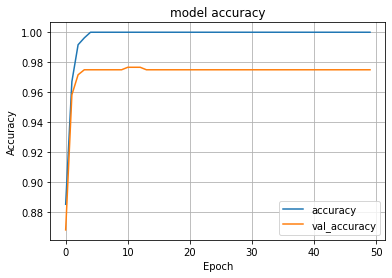

In [26]:
metrics[['accuracy', 'val_accuracy']].plot()
plt.grid()
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")

Text(0.5, 0, 'Epoch')

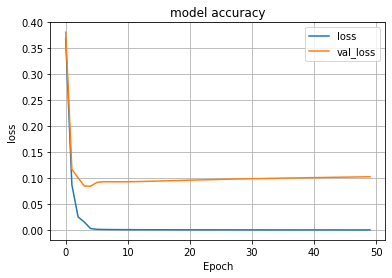

In [25]:
metrics[['loss', 'val_loss']].plot()
plt.grid()
plt.title("Model Loss")
plt.ylabel("loss")
plt.xlabel("Epoch")

In [17]:
_, acc= model.evaluate(x_test,y_test)
print("Accuracy =", (acc * 100.0), "%")

19/19 [==============================] - 1s 25ms/step - loss: 0.1025 - accuracy: 0.9750
Accuracy = 97.50000238418579 %


In [18]:
y_pred = model.predict(x_test)

In [19]:
mythreshold= 0.5
from sklearn.metrics import confusion_matrix
y_pred= (model.predict(x_test)>= mythreshold).astype(int)
cm= confusion_matrix(y_test, y_pred)
print(cm)

[[334   9]
 [  6 251]]


<AxesSubplot:>

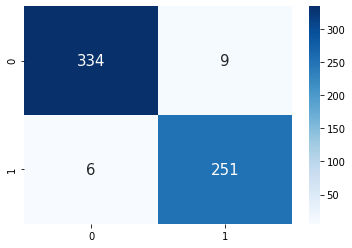

In [20]:
import seaborn as sns
sns.heatmap(cm, annot=True , cmap="Blues" , fmt="d", cbar=True, annot_kws={"size":10})
plt.title("Test Data")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")

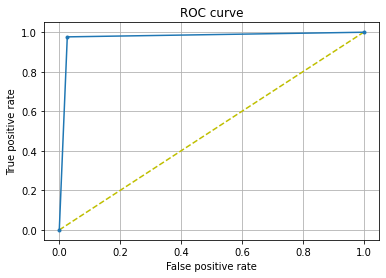

In [27]:
from sklearn.metrics import roc_curve
y_preds = model.predict(x_test).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.grid()
plt.figure(1)
plt.plot([0, 1], [0, 1], 'y--')
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()

In [22]:
from sklearn.metrics import auc
auc_value = auc(fpr, tpr)
print("Area under curve, AUC = ", auc_value)

Area under curve, AUC =  0.9752073147213305


In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       343
           1       0.97      0.98      0.97       257

    accuracy                           0.97       600
   macro avg       0.97      0.98      0.97       600
weighted avg       0.98      0.97      0.98       600

